# Preparación de Dataset Balanceado para Proyecto de Miel IA

Este notebook crea una versión reducida y balanceada del dataset original, asegurando una distribución aproximadamente igual de valores en la columna `gb_score`.

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")

## 1. Cargar el Dataset Original

In [3]:
# Reemplaza 'ruta_al_dataset.csv' con la ruta a tu archivo
ruta_dataset = 'emg_balanced_binary.csv'

# Cargar el dataset
try:
    # Intenta con diferentes codificaciones si es necesario
    df_original = pd.read_csv(ruta_dataset)
    # Alternativa: df_original = pd.read_excel(ruta_dataset) para archivos Excel
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Si es un problema de codificación, intenta: pd.read_csv(ruta_dataset, encoding='latin1') o 'utf-8'")
    raise

## 2. Explorar el Dataset Original

In [4]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(df_original.head())

# Información sobre las columnas
print("\nInformación del dataset:")
display(df_original.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df_original.describe())

Primeras filas del dataset:


,standard_deviation_e1,standard_deviation_e2,standard_deviation_e3,standard_deviation_e4,standard_deviation_e5,standard_deviation_e6,standard_deviation_e7,standard_deviation_e8,root_mean_square_e1,root_mean_square_e2,...,willison_amplitude_e3,willison_amplitude_e4,willison_amplitude_e5,willison_amplitude_e6,willison_amplitude_e7,willison_amplitude_e8,label,gesture,gb_score,is_synthetic
0,0.095171,0.045793,0.039167,0.056886,0.025942,0.022525,0.020427,0.020765,0.085093,0.038707,...,0.142857,0.153846,0.000000,0.000000,0.071429,0.071429,1,index_finger,1,0
1,0.124557,0.063950,0.136178,0.052121,0.045584,0.041957,0.034496,0.033183,0.114915,0.055589,...,0.285714,0.000000,0.090909,0.142857,0.071429,0.142857,1,index_finger,1,0
2,0.087322,0.058739,0.055908,0.057614,0.043614,0.047082,0.039193,0.032423,0.077393,0.050708,...,0.071429,0.000000,0.000000,0.142857,0.142857,0.071429,1,index_finger,1,0
3,0.085425,0.055204,0.061297,0.129018,0.035555,0.034858,0.021106,0.022684,0.074900,0.047179,...,0.428571,0.307692,0.000000,0.071429,0.000000,0.000000,1,index_finger,1,0
4,0.092773,0.054181,0.044757,0.079551,0.037965,0.037268,0.035124,0.029859,0.083379,0.046036,...,0.071429,0.153846,0.000000,0.142857,0.142857,0.142857,1,index_finger,1,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30858 entries, 0 to 30857
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   standard_deviation_e1        30858 non-null  float64
 1   standard_deviation_e2        30858 non-null  float64
 2   standard_deviation_e3        30858 non-null  float64
 3   standard_deviation_e4        30858 non-null  float64
 4   standard_deviation_e5        30858 non-null  float64
 5   standard_deviation_e6        30858 non-null  float64
 6   standard_deviation_e7        30858 non-null  float64
 7   standard_deviation_e8        30858 non-null  float64
 8   root_mean_square_e1          30858 non-null  float64
 9   root_mean_square_e2          30858 non-null  float64
 10  root_mean_square_e3          30858 non-null  float64
 11  root_mean_square_e4          30858 non-null  float64
 12  root_mean_square_e5          30858 non-null  flo

None


Estadísticas descriptivas:


,standard_deviation_e1,standard_deviation_e2,standard_deviation_e3,standard_deviation_e4,standard_deviation_e5,standard_deviation_e6,standard_deviation_e7,standard_deviation_e8,root_mean_square_e1,root_mean_square_e2,...,willison_amplitude_e2,willison_amplitude_e3,willison_amplitude_e4,willison_amplitude_e5,willison_amplitude_e6,willison_amplitude_e7,willison_amplitude_e8,label,gb_score,is_synthetic
count,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,...,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000
mean,0.526388,0.533511,0.542578,0.525941,0.517970,0.520945,0.539223,0.524414,0.523682,0.531254,...,0.561163,0.579361,0.527817,0.514309,0.535624,0.569331,0.543412,0.850509,0.500000,0.778923
std,0.299932,0.292920,0.288318,0.295109,0.305654,0.307049,0.293922,0.303310,0.303687,0.295093,...,0.272392,0.263109,0.301230,0.315373,0.293957,0.277202,0.296297,1.844011,0.500008,0.414979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306940,0.343730,0.366148,0.292300,0.231071,0.260725,0.364700,0.350206,0.283490,0.332916,...,0.392654,0.417374,0.362018,0.272727,0.357764,0.408128,0.372806,0.000000,0.000000,1.000000
50%,0.559757,0.560538,0.573156,0.556276,0.552281,0.558806,0.570009,0.559824,0.559273,0.560917,...,0.575357,0.601720,0.559919,0.556046,0.562082,0.595119,0.577112,0.000000,0.500000,1.000000
75%,0.777901,0.781310,0.780696,0.772132,0.776116,0.780865,0.784019,0.777965,0.779465,0.778265,...,0.784760,0.785714,0.775283,0.778896,0.779624,0.788347,0.785714,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000



Distribución de gb_score en el dataset original:


gb_score
1    50.0
0    50.0
Name: proportion, dtype: float64

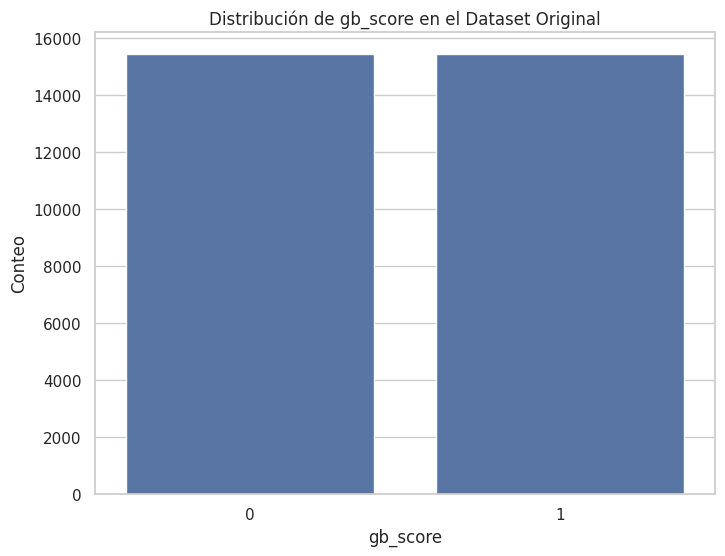

In [5]:
# Verificar la distribución actual de gb_score
if 'gb_score' in df_original.columns:
    print("\nDistribución de gb_score en el dataset original:")
    distribucion_original = df_original['gb_score'].value_counts(normalize=True) * 100
    display(distribucion_original)
    
    # Visualizar la distribución
    plt.figure(figsize=(8, 6))
    sns.countplot(x='gb_score', data=df_original)
    plt.title('Distribución de gb_score en el Dataset Original')
    plt.xlabel('gb_score')
    plt.ylabel('Conteo')
    plt.show()
else:
    print("\n¡ADVERTENCIA! La columna 'gb_score' no existe en el dataset.")
    print("Columnas disponibles:")
    print(df_original.columns.tolist())
    # En este caso se debe ajustar el nombre de la columna en el código siguiente

## 3. Crear una Copia Balanceada y Reducida

In [6]:
def crear_dataset_balanceado(df, columna_objetivo='gb_score', n_filas=100):
    """
    Crea un dataset balanceado según los valores de la columna objetivo.
    
    Args:
        df: DataFrame original
        columna_objetivo: Nombre de la columna que se desea balancear
        n_filas: Número máximo de filas en el dataset resultante
        
    Returns:
        DataFrame balanceado
    """
    # Verificar que la columna existe
    if columna_objetivo not in df.columns:
        raise ValueError(f"La columna '{columna_objetivo}' no existe en el dataset")
    
    # Obtener valores únicos
    valores_unicos = df[columna_objetivo].unique()
    
    # Calcular cuántas filas tomar de cada clase para un dataset balanceado
    filas_por_clase = n_filas // len(valores_unicos)
    
    # Crear un DataFrame vacío para almacenar el resultado balanceado
    df_balanceado = pd.DataFrame()
    
    # Para cada valor único en la columna objetivo
    for valor in valores_unicos:
        # Obtener todas las filas con ese valor
        df_valor = df[df[columna_objetivo] == valor]
        
        # Si hay menos filas disponibles que las requeridas, usar todas las disponibles
        n_disponibles = len(df_valor)
        n_tomar = min(filas_por_clase, n_disponibles)
        
        # Tomar una muestra aleatoria
        muestra = df_valor.sample(n=n_tomar, random_state=42)
        
        # Agregar al DataFrame balanceado
        df_balanceado = pd.concat([df_balanceado, muestra])
    
    # Si no se alcanzó el número deseado de filas, se pueden agregar más filas aleatorias
    filas_faltantes = n_filas - len(df_balanceado)
    if filas_faltantes > 0:
        # Excluir las filas ya seleccionadas
        df_restante = df[~df.index.isin(df_balanceado.index)]
        if len(df_restante) > 0:
            filas_adicionales = df_restante.sample(n=min(filas_faltantes, len(df_restante)), random_state=42)
            df_balanceado = pd.concat([df_balanceado, filas_adicionales])
    
    # Mezclar las filas para que no estén agrupadas por clase
    df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return df_balanceado

In [7]:
# Crear una copia balanceada del dataset
try:
    # Asegúrate de que el nombre de la columna sea el correcto
    columna_target = 'gb_score'  # Ajusta esto si tu columna tiene otro nombre
    
    df_balanceado = crear_dataset_balanceado(
        df=df_original,
        columna_objetivo=columna_target,
        n_filas=100
    )
    
    print(f"Dataset balanceado creado con {len(df_balanceado)} filas")
except Exception as e:
    print(f"Error al crear el dataset balanceado: {e}")

Dataset balanceado creado con 100 filas


## 4. Verificar el Balanceo del Nuevo Dataset


Distribución de gb_score en el dataset balanceado:


gb_score
0    50.0
1    50.0
Name: proportion, dtype: float64

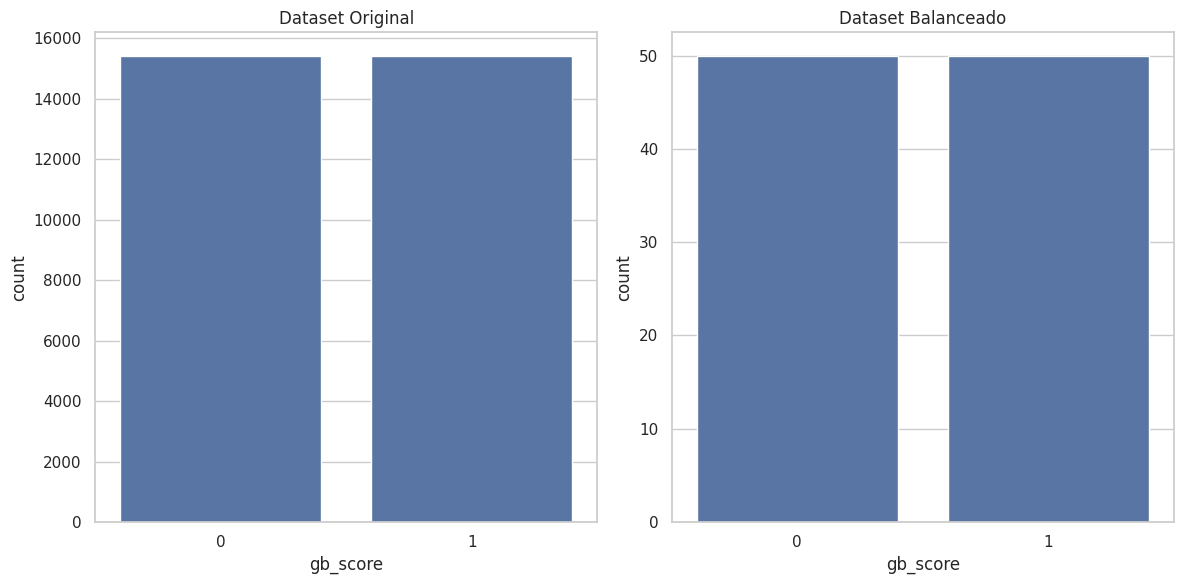

In [8]:
# Verificar la distribución en el dataset balanceado
if 'df_balanceado' in locals():
    print("\nDistribución de gb_score en el dataset balanceado:")
    distribucion_balanceada = df_balanceado[columna_target].value_counts(normalize=True) * 100
    display(distribucion_balanceada)
    
    # Visualizar la comparación
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=columna_target, data=df_original)
    plt.title('Dataset Original')
    plt.xlabel(columna_target)
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=columna_target, data=df_balanceado)
    plt.title('Dataset Balanceado')
    plt.xlabel(columna_target)
    
    plt.tight_layout()
    plt.show()

## 5. Guardar el Dataset Balanceado

In [9]:
# Guardar el dataset balanceado en un nuevo archivo
if 'df_balanceado' in locals():
    # Definir el nombre del archivo de salida
    nombre_archivo_salida = 'dataset_balanceado_100_filas.csv'
    
    # Guardar el dataset
    df_balanceado.to_csv(nombre_archivo_salida, index=False)
    print(f"\nDataset balanceado guardado como: {nombre_archivo_salida}")
    
    # También se podría guardar en formato Excel si es necesario
    # df_balanceado.to_excel('dataset_balanceado_100_filas.xlsx', index=False)


Dataset balanceado guardado como: dataset_balanceado_100_filas.csv


## 6. Comparación Adicional de los Datasets

In [10]:
# Estadísticas comparativas
if 'df_balanceado' in locals():
    print("\nEstadísticas del dataset original:")
    display(df_original.describe())
    
    print("\nEstadísticas del dataset balanceado:")
    display(df_balanceado.describe())
    
    # Verificar que no haya filas duplicadas
    duplicados = df_balanceado.duplicated().sum()
    print(f"\nNúmero de filas duplicadas en el dataset balanceado: {duplicados}")


Estadísticas del dataset original:


,standard_deviation_e1,standard_deviation_e2,standard_deviation_e3,standard_deviation_e4,standard_deviation_e5,standard_deviation_e6,standard_deviation_e7,standard_deviation_e8,root_mean_square_e1,root_mean_square_e2,...,willison_amplitude_e2,willison_amplitude_e3,willison_amplitude_e4,willison_amplitude_e5,willison_amplitude_e6,willison_amplitude_e7,willison_amplitude_e8,label,gb_score,is_synthetic
count,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,...,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000
mean,0.526388,0.533511,0.542578,0.525941,0.517970,0.520945,0.539223,0.524414,0.523682,0.531254,...,0.561163,0.579361,0.527817,0.514309,0.535624,0.569331,0.543412,0.850509,0.500000,0.778923
std,0.299932,0.292920,0.288318,0.295109,0.305654,0.307049,0.293922,0.303310,0.303687,0.295093,...,0.272392,0.263109,0.301230,0.315373,0.293957,0.277202,0.296297,1.844011,0.500008,0.414979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306940,0.343730,0.366148,0.292300,0.231071,0.260725,0.364700,0.350206,0.283490,0.332916,...,0.392654,0.417374,0.362018,0.272727,0.357764,0.408128,0.372806,0.000000,0.000000,1.000000
50%,0.559757,0.560538,0.573156,0.556276,0.552281,0.558806,0.570009,0.559824,0.559273,0.560917,...,0.575357,0.601720,0.559919,0.556046,0.562082,0.595119,0.577112,0.000000,0.500000,1.000000
75%,0.777901,0.781310,0.780696,0.772132,0.776116,0.780865,0.784019,0.777965,0.779465,0.778265,...,0.784760,0.785714,0.775283,0.778896,0.779624,0.788347,0.785714,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000



Estadísticas del dataset balanceado:


,standard_deviation_e1,standard_deviation_e2,standard_deviation_e3,standard_deviation_e4,standard_deviation_e5,standard_deviation_e6,standard_deviation_e7,standard_deviation_e8,root_mean_square_e1,root_mean_square_e2,...,willison_amplitude_e2,willison_amplitude_e3,willison_amplitude_e4,willison_amplitude_e5,willison_amplitude_e6,willison_amplitude_e7,willison_amplitude_e8,label,gb_score,is_synthetic
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.520178,0.544133,0.537738,0.529431,0.500307,0.518380,0.549027,0.513521,0.503770,0.505668,...,0.554004,0.586663,0.547052,0.500977,0.562648,0.567293,0.545670,0.920000,0.500000,0.750000
std,0.308294,0.305505,0.284094,0.302339,0.317991,0.300302,0.288900,0.302827,0.308181,0.300274,...,0.287510,0.241955,0.325049,0.329771,0.290021,0.264811,0.293458,1.823971,0.502519,0.435194
min,0.027539,0.006909,0.012207,0.029268,0.025344,0.006287,0.002583,0.006398,0.021527,0.010329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260160,0.235000,0.346588,0.299919,0.151644,0.304707,0.363276,0.195165,0.263889,0.225193,...,0.377877,0.437385,0.335453,0.181818,0.372569,0.433100,0.372367,0.000000,0.000000,0.750000
50%,0.565304,0.605031,0.551202,0.564926,0.552050,0.549714,0.583994,0.551334,0.507459,0.513184,...,0.571429,0.628202,0.618028,0.555021,0.582133,0.581396,0.571882,0.000000,0.500000,1.000000
75%,0.781231,0.782908,0.768619,0.778174,0.772903,0.772763,0.789568,0.770514,0.769514,0.752101,...,0.807502,0.773051,0.802387,0.785373,0.795039,0.752613,0.775575,0.250000,1.000000,1.000000
max,0.983427,0.997261,0.996222,0.981163,0.992252,0.991579,0.999818,0.969965,0.995043,0.997769,...,0.986335,0.994405,0.995690,0.998413,0.986711,0.990329,0.992414,7.000000,1.000000,1.000000



Número de filas duplicadas en el dataset balanceado: 0


In [11]:
df_original.head()

,standard_deviation_e1,standard_deviation_e2,standard_deviation_e3,standard_deviation_e4,standard_deviation_e5,standard_deviation_e6,standard_deviation_e7,standard_deviation_e8,root_mean_square_e1,root_mean_square_e2,...,willison_amplitude_e3,willison_amplitude_e4,willison_amplitude_e5,willison_amplitude_e6,willison_amplitude_e7,willison_amplitude_e8,label,gesture,gb_score,is_synthetic
0,0.095171,0.045793,0.039167,0.056886,0.025942,0.022525,0.020427,0.020765,0.085093,0.038707,...,0.142857,0.153846,0.000000,0.000000,0.071429,0.071429,1,index_finger,1,0
1,0.124557,0.063950,0.136178,0.052121,0.045584,0.041957,0.034496,0.033183,0.114915,0.055589,...,0.285714,0.000000,0.090909,0.142857,0.071429,0.142857,1,index_finger,1,0
2,0.087322,0.058739,0.055908,0.057614,0.043614,0.047082,0.039193,0.032423,0.077393,0.050708,...,0.071429,0.000000,0.000000,0.142857,0.142857,0.071429,1,index_finger,1,0
3,0.085425,0.055204,0.061297,0.129018,0.035555,0.034858,0.021106,0.022684,0.074900,0.047179,...,0.428571,0.307692,0.000000,0.071429,0.000000,0.000000,1,index_finger,1,0
4,0.092773,0.054181,0.044757,0.079551,0.037965,0.037268,0.035124,0.029859,0.083379,0.046036,...,0.071429,0.153846,0.000000,0.142857,0.142857,0.142857,1,index_finger,1,0


In [12]:
df_balanceado.columns

Index(['standard_deviation_e1', 'standard_deviation_e2',
       'standard_deviation_e3', 'standard_deviation_e4',
       'standard_deviation_e5', 'standard_deviation_e6',
       'standard_deviation_e7', 'standard_deviation_e8', 'root_mean_square_e1',
       'root_mean_square_e2', 'root_mean_square_e3', 'root_mean_square_e4',
       'root_mean_square_e5', 'root_mean_square_e6', 'root_mean_square_e7',
       'root_mean_square_e8', 'minimum_e1', 'minimum_e2', 'minimum_e3',
       'minimum_e4', 'minimum_e5', 'minimum_e6', 'minimum_e7', 'minimum_e8',
       'maximum_e1', 'maximum_e2', 'maximum_e3', 'maximum_e4', 'maximum_e5',
       'maximum_e6', 'maximum_e7', 'maximum_e8', 'zero_crossings_e1',
       'zero_crossings_e2', 'zero_crossings_e3', 'zero_crossings_e4',
       'zero_crossings_e5', 'zero_crossings_e6', 'zero_crossings_e7',
       'zero_crossings_e8', 'average_amplitude_change_e1',
       'average_amplitude_change_e2', 'average_amplitude_change_e3',
       'average_amplitude_change_

In [15]:
df_balanceado.describe()

,standard_deviation_e1,standard_deviation_e2,standard_deviation_e3,standard_deviation_e4,standard_deviation_e5,standard_deviation_e6,standard_deviation_e7,standard_deviation_e8,root_mean_square_e1,root_mean_square_e2,...,willison_amplitude_e2,willison_amplitude_e3,willison_amplitude_e4,willison_amplitude_e5,willison_amplitude_e6,willison_amplitude_e7,willison_amplitude_e8,label,gb_score,is_synthetic
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.520178,0.544133,0.537738,0.529431,0.500307,0.518380,0.549027,0.513521,0.503770,0.505668,...,0.554004,0.586663,0.547052,0.500977,0.562648,0.567293,0.545670,0.920000,0.500000,0.750000
std,0.308294,0.305505,0.284094,0.302339,0.317991,0.300302,0.288900,0.302827,0.308181,0.300274,...,0.287510,0.241955,0.325049,0.329771,0.290021,0.264811,0.293458,1.823971,0.502519,0.435194
min,0.027539,0.006909,0.012207,0.029268,0.025344,0.006287,0.002583,0.006398,0.021527,0.010329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260160,0.235000,0.346588,0.299919,0.151644,0.304707,0.363276,0.195165,0.263889,0.225193,...,0.377877,0.437385,0.335453,0.181818,0.372569,0.433100,0.372367,0.000000,0.000000,0.750000
50%,0.565304,0.605031,0.551202,0.564926,0.552050,0.549714,0.583994,0.551334,0.507459,0.513184,...,0.571429,0.628202,0.618028,0.555021,0.582133,0.581396,0.571882,0.000000,0.500000,1.000000
75%,0.781231,0.782908,0.768619,0.778174,0.772903,0.772763,0.789568,0.770514,0.769514,0.752101,...,0.807502,0.773051,0.802387,0.785373,0.795039,0.752613,0.775575,0.250000,1.000000,1.000000
max,0.983427,0.997261,0.996222,0.981163,0.992252,0.991579,0.999818,0.969965,0.995043,0.997769,...,0.986335,0.994405,0.995690,0.998413,0.986711,0.990329,0.992414,7.000000,1.000000,1.000000
